In [1]:
# -*- coding: utf-8 -*-
import dataiku

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.metrics import brier_score_loss
from sklearn.metrics import matthews_corrcoef

from sklearn.calibration import calibration_curve

from sklearn.tree import DecisionTreeClassifier, plot_tree



Please import `spmatrix` from the `scipy.sparse` namespace; the `scipy.sparse.base` namespace is deprecated and will be removed in SciPy 2.0.0.
`scipy.optimize.linesearch.line_search_wolfe2` is deprecated along with the `scipy.optimize.linesearch` namespace. `scipy.optimize.linesearch.line_search_wolfe2` will be removed in SciPy 1.14.0, and the `scipy.optimize.linesearch` namespace will be removed in SciPy 2.0.0.
`scipy.optimize.linesearch.line_search_wolfe1` is deprecated along with the `scipy.optimize.linesearch` namespace. `scipy.optimize.linesearch.line_search_wolfe1` will be removed in SciPy 1.14.0, and the `scipy.optimize.linesearch` namespace will be removed in SciPy 2.0.0.


# Import des données

In [3]:
# Read recipe inputs
df = dataiku.Dataset("table_cours_scoring").get_dataframe()

In [4]:
df.shape

(163567, 132)

In [5]:
df.head()

,DATDELHIS_Mm0,NUMTECPRS,SLDCRDMMS_SUM_Mm1,ENGAGEMENT_SUM_Mm1,Top_PRET_CONSO_Mm1,NBR_PRET_CONSO_Mm1,SLDCRDMMS_SUM_Mm2,ENGAGEMENT_SUM_Mm2,Top_PRET_CONSO_Mm2,NBR_PRET_CONSO_Mm2,SLDCRDMMS_SUM_Mm3,Top_PRET_CONSO_Mm3,NBR_PRET_CONSO_Mm3,ENGAGEMENT_SUM_Mm3,SLDCRDMMS_SUM_Mm4,ENGAGEMENT_SUM_Mm4,Top_PRET_CONSO_Mm4,NBR_PRET_CONSO_Mm4,SLDCRDMMS_SUM_Mm5,ENGAGEMENT_SUM_Mm5,Top_PRET_CONSO_Mm5,NBR_PRET_CONSO_Mm5,SLDCRDMMS_SUM_Mm6,ENGAGEMENT_SUM_Mm6,Top_PRET_CONSO_Mm6,NBR_PRET_CONSO_Mm6,SUM_MENSUALITE_IMO,MONTANT_SUM,TOP_PRET_IMO,SLDDBTMMS_SUM,SLDDBTMMS_MOY,SLDCRDMMS_SUM,SLDCRDMMS_MOY,BILAN_SUM,HORSBILAN_SUM,ENGAGEMENT_SUM,SUM_NOMBRE_CONTRAT_IMO,NBRJJRDVTAUTCSC_STK,DECOUVERT_MOY_SUM,DECOUVERT_MOY_MEAN,IND_DP_MAX,IMPAYE_SUM,DEPASSEMENT_SUM,Top_PRET_CONSO,NBR_PRET_CONSO,MAX_NBRJJR_SS_Mm1_Mm0,MAX_NBRJJR_SS_Mm2_Mm0,MAX_NBRJJR_SS_Mm3_Mm0,MAX_CODNIV_DB_Mm1_Mm0,MAX_CODNIV_DB_Mm2_Mm0,MAX_CODNIV_DB_Mm3_Mm0,NBRJJR_SS,ANCIENNETE,AGEPRS,CODITDBDF_PAR,TOPLS,CODACVPRO_modif,client_haut_risque,MNTSLDCTAJJR_MAX_Mm0,MNTSLDCTAJJR_MAX_Mm1,MNTSLDCTAJJR_MAX_Mm2,INDEXCLFDC,INDRESFISPAR,IAC_CRED,INDRSKDTX,INDRSKLIT,INDRSKCTX,INDRSKRCVRMT,INDRSKSUREDT,INDRSKITDBDF,INDRSKINC,CODCNDFRG,NBVIRPEREMI,MNTVIRPEREMI,NBVIRPONEMIGLISS_M12,MNTVIRPONEMI,MNTECSAVO,NBVIRPONRCP,MNTVIRPONRCP,NBCHQEMI,NBCHQEMIGLISS_M12,MNTCHQEMI,MNTTOTMVTAFF,MNTTOTMVTAFFGLISS_M12,NBPLV,MNTPLV,NBOPECAR,NBOPECARGLISS_M12,MNTOPECAR,codsexprs,NBPMTCAR,NBPMTCARGLISS_M12,MNTPMTCAR,NBRETCAR,NBRETCARGLISS_M12,MNTRETCAR,NBECRCRD,MNTECRCRD,NBECRDBT,MNTECRDBT,MNTECSCPTDPT,NB_CREDITS_IMMO,NB_CREDITS_DA,NB_CREDITS_CONSO_RENOUVELABLES,NB_CREDITS_CONSO_AMORTISSABLES,RATIO_MENSU_IMO_SOLDE_CRD,SLDCRDMMS_SUM_Mm6_Mm1_moy,min_SLDCRDMMS_SUM_Mm6_Mm1,RATIO_SLDCRDMMS_MOY_SLDBTSUM,ENG_NBR,part_FDC_prio,RATIO_MENSU_IMO_SOLDE_DBTSUM,RATIO_MENSU_IMO_ENGAGEMENT_SUM,RATIO_MENSU_IMO_SOLCRDMOY,RATIO_MNTVIRPEREMI_NBVIRPEREMI,RATIO_NBRETCAR_ENGAGEMENT_SUM,TOP_NBRJJR_SS_Mm3_Mm0_30p,Top_NDB_MODELE_Mm3_Mm1,NDB_MODELE_Mm3_Mm1_SUM,CRTAD_AG_SOLDE_T,CRTAD_AG_SOLDE_T1,CRTAD_AG_SOLDE_T2,ENCOURS_PAR,CRTAD_AG_NBJDE_BB,CRTAD_AG_NBJDE_BA,CRTAD_AG_NBJDE_BC,TOPCPTLITIG,SOMME_ENCOURS,cible,rnd_1_20,score,id
0,202411,9104013803,68893.0,27019.21,1.0,2.0,68911.0,27490.69,1.0,2.0,101251.0,1.0,2.0,27961.50,94563.0,28431.61,1.0,2.0,75117.0,28901.03,1.0,2.0,72634.0,29369.79,1.0,2.0,0.0,0.0,0,0.0,0.0,64431.0,21477.00000,26547.05,0.0,26547.05,0,0.0,0.0,0.0,0,0.0,0.00,1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,264.0,61.0,0.0,0.0,5100.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,24.0,-3400.0,15691.11,3.0,3459.44,1.0,8.0,-130.0,4274.44,45958.88,7.0,-2141.66,30.0,300.0,918.69,1,29.0,288.0,818.69,1.0,12.0,100.0,7.0,7674.44,39.0,-7017.09,2146.36,0.0,0.0,0.0,2.0,0.0,80228.164000,68893.0,0.0,0.0,Réseau,0.0,0.0,0.0,0.0,0.000038,0,0.0,0.0,259000.0,263000.0,295000.0,1417000.0,0.0,0.0,0.0,0.0,1417000.0,0,2,1000.000000,202411@9104013803
1,202406,3228813225,1059.0,2495.59,1.0,1.0,1166.0,2615.28,1.0,1.0,1146.0,1.0,1.0,2734.50,1369.0,2853.25,1.0,1.0,1106.0,2971.53,1.0,1.0,1249.0,3089.34,1.0,1.0,0.0,0.0,0,0.0,0.0,1484.0,494.66666,2375.42,0.0,2375.42,0,0.0,0.0,0.0,0,0.0,0.00,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64.0,23.0,0.0,0.0,5400.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,44.85,0.0,0.00,0.0,0.0,0.0,140.00,1240.00,1.0,-4.00,0.0,0.0,0.00,1,0.0,0.0,0.00,0.0,0.0,0.0,1.0,140.00,2.0,-139.22,44.85,0.0,0.0,0.0,1.0,0.0,1182.500000,1059.0,0.0,0.0,Réseau,0.0,0.0,0.0,0.0,0.000000,0,0.0,0.0,3000.0,3666.0,7000.0,0.0,0.0,0.0,0.0,0.0,0.0,0,20,599.523529,202406@3228813225
2,202411,5599518626,276741.0,2791.88,0.0,0.0,1618089.0,2899.23,0.0,0.0,174448.0,0.0,0.0,2700.00,221239.0,2700.00,0.0,0.0,228334.0,2873.60,0.0,0.0,276045.0,2897.65,0.0,0.0,0.0,0.0,0,0.0,0.0,226716.0,75572.00000,0.00,2700.0,2700.00,0,0.0,0.0,0.0,0,0.0,0.00,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,898.0,78.0,0.0,0.0,7600.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,30.0,0.0,62157.30,5.0,1588.26,0.0,16.0,0.0,1588.26,148364.48,21.0,-716.42,15.0,249.0,1491.64,2,15.0,2

Le score de 0 correspond en fait à une proba de 1, et le score de 100 à une proba de 0.
Pour python, on remet tout cela à l'endroit

In [6]:
df['score_python'] = 1000-df['score']

In [7]:
df['proba_theorique'] = df['score_python']/1000

# Croisement des variables non utilisées

cette partie sera expliquée à l'oral lors du prochain cours.
Synthétiquement, cela consiste à faire le croisement entre les modalités de 2 variables qui ne sont pas rentrées dans le score

var 1 en 2 modalités et var 2 en 3 modlaités
on a alors 6 combinaisons possibles : 1@1, 1@2, 1@3, 2@1, 2@2 et 2@3
On trace la stabilité en risque et volume des modalités combinées et on regarde lesquelles doivent etre fusionnées.

On se retrouve à la fin avec une variable davantage liée avec la cible.

# Rappel des performances de mon score

In [13]:
y_true = df["cible"].astype(int).values        # 0/1
y_score = df["proba_theorique"].astype(float).values  # score/1000

## AUC

In [14]:
def plot_ROC_AUC(y_true, y_score, plot=True, _return=False):
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    auc = roc_auc_score(y_true, y_score)
    
    if plot:
        plt.figure(figsize=(8,8))
        plt.plot(fpr, tpr, color="C0", lw=2, label=f"ROC (AUC = {auc:.2%})")
        plt.plot([0,1],[0,1], color="grey", lw=1, linestyle="--", label="Alea")
        plt.fill_between(fpr, tpr, alpha=0.15, color="C0")
        plt.xlim([-0.01, 1.01])
        plt.ylim([-0.01, 1.01])
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title("Courbe ROC")
        plt.legend(loc="lower right")
        plt.grid(alpha=0.3)
        plt.show()
    
    if _return:
        return fpr, tpr, thresholds, auc

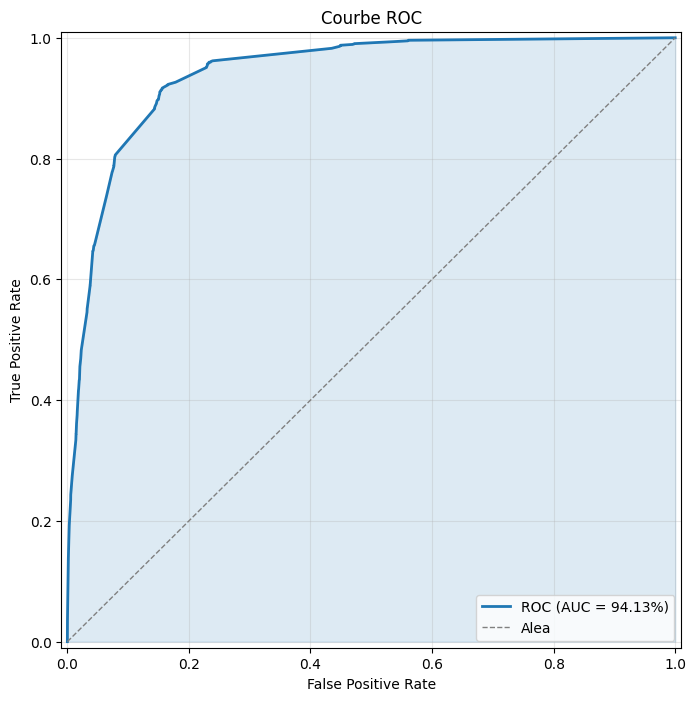

In [15]:
plot_ROC_AUC(y_true, y_score)

In [16]:
auc = roc_auc_score(y_true, y_score)
print(f"AUC: {auc:.2%}")

AUC: 94.13%


In [17]:
gini = 2 * auc - 1
print(f"Gini: {gini:.2%}")

Gini: 88.26%


L’**AUC** (ou AUC ROC) (Area Under the ROC Curve) mesure la capacité d’un score probabiliste à classer correctement un couple d’observations tirées aléatoirement, l’une positive et l’autre négative ; numériquement, c’est la probabilité que le modèle attribue un score plus élevé à la positive qu’à la négative.

L’AUC est indépendante du seuil de décision et résume la courbe ROC qui trace le taux de vrais positifs en fonction du taux de faux positifs pour tous les seuils.

Des seuils empirique d'AUC existent :
- 0.90–1.00 : Excellent — séparation très forte; rare pour problèmes difficiles.
- 0.80–0.90 : Très bon — bonne capacité discriminative pour la plupart des usages.
- 0.70–0.80 : Acceptable / Correct — utile mais améliorable, vérifier calibration et utilité métier.
- 0.60–0.70 : Faible — discrimination limitée; probablement insuffisant en production sans contraintes métier fortes.
- < 0.60 : Mauvais / proche du hasard — peu de valeur discriminative; reconsidérer features ou modèle.

Ces bornes sont des repères pratiques, pas des règles absolues ; l’interprétation dépend du contexte, du coût des erreurs et du déséquilibre des classes.

**Attention**, lorsque l'évènement mesuré est rare, il faut compléter l'analyse par une analyse de l'AUC PR car l'AUC ROC peut paraître élevé même si la précision sur les événements rares est faible.

De plus, l'analyse des mesures de calibration (Brier, reliability diagram, ECE) est necessaire car un bon AUC n'implique pas forcément que les probabilités soient correctement calibrées.

Pour simplifier, une AUC de 94,13% veut dire que, si je prends 2 individus au hasard dans ma base, un positif et un négatif, j'ai 84.78% de chance que le score classe le positif comme plus risqué que le négatif.

Cela ne dit en rien si la probabilité calculée par le score est la bonne.

**En somme, dans notre modèle, on classe très bien les individus en termes de risque**



Le ***coefficient de Gini*** utilisé en scoring binaire mesure la capacité de discrimination d’un score en quantifiant l’inégalité entre la distribution des scores pour les positifs et les négatifs; il est essentiellement une transformation de l’AUC : Gini = 2 * AUC − 1, ce qui le relie directement à la probabilité qu’une observation positive soit mieux classée qu’une négative.

Dans l’usage courant, le Gini prend des valeurs proches de 0 pour un modèle sans pouvoir discriminant et proches de 1 pour un modèle parfait; des valeurs négatives indiquent un ordre inversé (le score favorise les négatifs) et signalent un grave problème de construction ou d’inversion des labels.

Des seuils empiriques existent :
- Gini ≥ 0.70 : Excellent — très forte séparation, rare sur des problèmes difficiles; approprié pour production critique.
- 0.60 ≤ Gini < 0.70 : Très bon — solide performance pour la plupart des usages industriels.
- 0.40 ≤ Gini < 0.60 : Correct / Acceptable — utile mais à compléter par contrôles opérationnels et calibration.
- 0.20 ≤ Gini < 0.40 : Faible — discrimination limitée; revoir features ou méthode.
- Gini < 0.20 : Mauvais — peu d’intérêt opérationnel, risque d’overfitting ou données non informatives.

Ces bornes sont des repères empiriques couramment adoptés en credit scoring.

**Attention**, Le Gini évalue la discrimination (ordre des scores) mais ne renseigne pas sur la calibration des probabilités; il faut donc l’accompagner de métriques de calibration (Brier, ECE).

En présence de classes très déséquilibrées, compléter par AUC PR.

## AUC PR et ratio de performance

In [18]:
precision, recall, thresholds = precision_recall_curve(y_true, y_score)

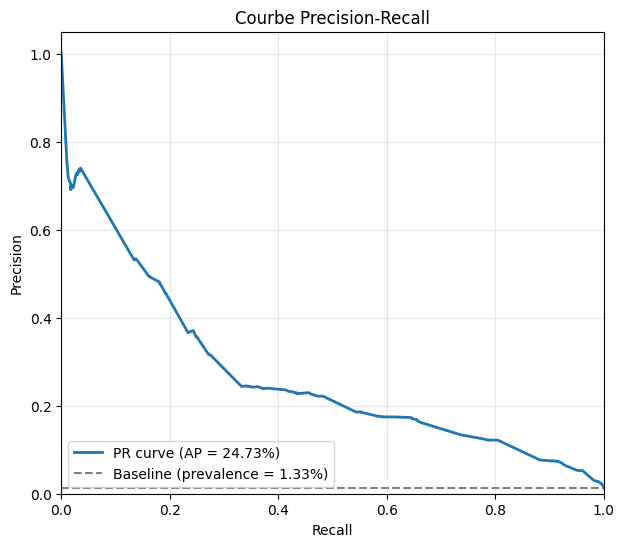

In [19]:
plt.figure(figsize=(7,6))
plt.plot(recall, precision, color="C0", lw=2, label=f"PR curve (AP = {average_precision_score(y_true, y_score):.2%})")
plt.hlines(y_true.mean(), 0, 1, colors="grey", linestyles="--", label=f"Baseline (prevalence = {y_true.mean():.2%})")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Courbe Precision-Recall")
plt.legend(loc="lower left")
plt.grid(alpha=0.3)
plt.show()

In [20]:
auc_pr = average_precision_score(y_true, y_score)
print(f"AUC PR: {auc_pr:.2%}")

AUC PR: 24.73%


In [21]:
prevalence = y_true.mean()
performance_ratio = auc_pr / prevalence if prevalence > 0 else np.nan
print(f"Ratio de performance: {performance_ratio:.2f}")

Ratio de performance: 18.61


L’AUC‑PR (ou Average Precision) résume la courbe Precision–Recall en une seule valeur entre 0 et 1 et mesure la capacité d’un score à produire des prédictions avec à la fois une bonne précision et un bon rappel; **elle est particulièrement appropriée quand la classe positive est rare.**

La valeur de référence (baseline) d’une courbe PR correspond à la prévalence empirique de la classe positive dans les données; une courbe PR qui coïncide avec cette ligne signifie qu’un classifieur aléatoire atteindrait la même précision moyenne, donc l’Average Precision doit être comparée à la prévalence pour juger de l’amélioration effective.

Quand la prévalence est faible, la ligne de base est basse et une petite augmentation absolue de l’AP peut représenter un gain relatif important pour la détection des positifs. Inversement, pour une prévalence élevée, une AP élevée est plus facile à obtenir et l’interprétation doit tenir compte du contexte métier et des coûts d’erreur.

**Il n'existe pas de seuils empiriques relatifs à l'AUC PR, car les valeus dépendent de la valeur de baseline.**
Pour cela, on utilise le ratio de performance.



Le **ratio de performance mesure combien de fois la performance moyenne en précision du modèle dépasse la précision moyenne attendue en tirant au hasard des observations positives selon la prévalence**. Ce ratio met en évidence le gain relatif apporté par le score quand la prévalence est faible.

En effet, l'AUC PR peut sembler petite si la prévalence est très faible, cela même si le modèle est bien meilleur que la baselinbe.

Des seuils empiriques peuvent exister : 
- ratio ≈ 1 : pas d’amélioration par rapport à la prévalence.
- ratio entre 1.5 et 3 : amélioration utile selon le contexte opérationnel.
- ratio > 3 : souvent considéré comme un fort gain relatif pour des actions ciblées.

Ces bornes sont des repères empiriques dépendant du domaine et du coût des actions. Un ratio élevé peut tout de même cacher une AUCPR faible en valeur absolue si la prévalence est extrêmement basse, d’où la nécessité d'analyser AUCROC et AUCPR conjointement.

**Pour simplifier, un ratio de performance de 18 indique que votre modèle identifie en moyenne 18 fois plus de vrais positifs que le hasard parmi les individus classés en positifs (précision du modèle).**

## KS Stat

On peut également utiliser la statistique de kolmogorov smirnov pour mesurer la distance maximale entre les distributions comullées des scores des positifs et des négatifs.

Cette métrique mesire la séparation entre les distributions des scores prédits pour la classe positive et la classe négative.

Intuitivement, pour chaque sueil, on calcul la proportion cumulée de positifs et de négatifs et on regarde la distance entre les deux.

- KS = 0 --> les distributions sont identiques et donc il n'y a aucune discrimination
- KS > 40% --> discrimination correcte
- KS > 70% --> discrimination forte

Cela donne in fine une idée de la qualité du tri des individus

In [22]:
def ks_stat(y_true, y_score):
    df = pd.DataFrame({"y_true": y_true, "y_score": y_score})
    df = df.sort_values('y_score').reset_index(drop=True)
    
    total_pos = (df['y_true'] == 1).sum()
    total_neg = (df['y_true'] == 0).sum()    
    
    df["cum_pos"] = (df['y_true'] == 1).cumsum() / total_pos
    df["cum_neg"] = (df['y_true'] == 0).cumsum() / total_neg
    
    df['ks'] = np.abs(df["cum_pos"]-df["cum_neg"])
    
    ks_index = df['ks'].idxmax()
    ks_value = df.loc[ks_index, 'ks']
    ks_point = df.loc[ks_index, "y_score"]
    
    return ks_value, ks_point, df

In [23]:
def plot_ks(y_true, y_score):
    ks_value, ks_point, df = ks_stat(y_true, y_score)
    
    plt.figure(figsize=(10, 6))
    
    plt.plot(df["y_score"], df['cum_pos'], label="CDF positif")
    plt.plot(df["y_score"], df['cum_neg'], label='CDF négatif')
    
    plt.plot(df["y_score"], df["ks"], label='Différence cumulée')
    
    # Point KS
    ks_index = df['ks'].idxmax()
    plt.scatter(df.loc[ks_index, "y_score"], df.loc[ks_index, "ks"], color='red')
    plt.text(
        df.loc[ks_index, "y_score"],
        df.loc[ks_index, "ks"],
        f" KS={ks_value:.1%}\nScore={ks_point:.2f}",
        verticalalignment="bottom"
    )
    
    plt.title('KS plot')
    plt.xlabel('Score')
    plt.ylabel("Valeus cumulées")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

    

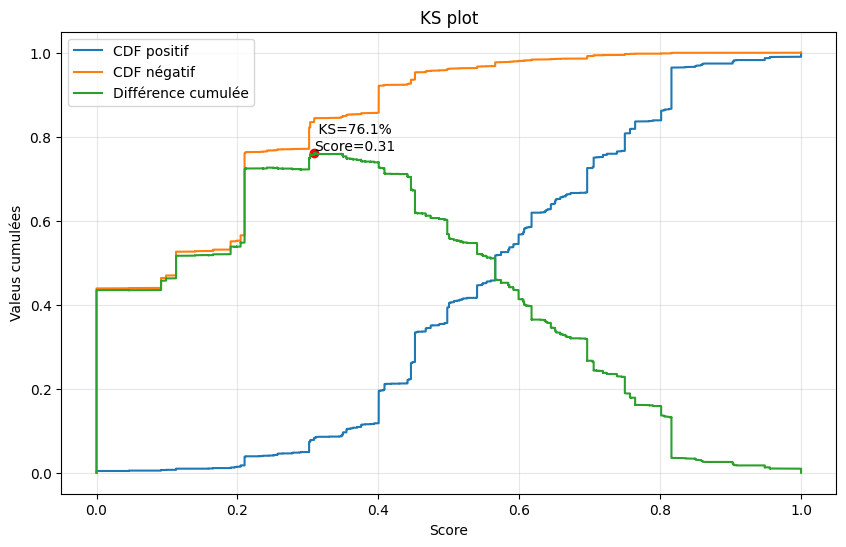

In [24]:
plot_ks(y_true, y_score)

## Partial AUC ROC

Une autre métrique utilisable est le Partial AUC (ROC). Son objectif est de mesurer l'auc roc non pas sur la population totale, mais uniquement dans une sous zone d'interet du modèle.
Typiquement, on regarde la zone où le score est le plus élevé (le n clients les plus mal notés), ou on regarde la zone du ROC la moins performante.

Pourquoi faire cela?
Dans la vraie vie, on utilise régulièrement un modèle uniquement pour ces prédictions dans un top/flop x% (en détection de fraude notamment). L'AUC global ne dit rien sur ce qu'il se apsse dans la zone la plus critique, d'où l'utilisation du pAUC-ROC 

In [25]:
def pAUC_ROC(y_true, y_score, percent, segment='top'):
    
    segment = segment.lower()
    if segment not in ['top', 'bottom']:
        raise ValueError("segment doit valoir 'top' ou 'bottom'")
        
    if not (0 <= percent <= 1):
        raise ValueError("percent doit etre un pourcentage entre 0 et 1")
        
        
    df = pd.DataFrame({"y_true": y_true, "y_score": y_score})
    df = df.sort_values('y_score', ascending=(segment=='bottom')).reset_index(drop=True)
    
    n = len(df)
    k = int(np.ceil(percent*n))
    df_seg = df.iloc[:k]
    
    if df_seg['y_true'].nunique() < 2:
        return df_seg, np.nan
    
    return df_seg, roc_auc_score(df_seg['y_true'], df_seg['y_score'])
    

In [26]:
pAUC_ROC(y_true, y_score, 0.05, 'top')[1]

0.648967408665358

In [27]:
def plot_ROC_AUC_global_partial(y_true, y_score, percents, segment='top'):
    fpr_full, tpr_full, _, auc_full = plot_ROC_AUC(y_true, y_score, plot=False, _return=True)
    
    plt.figure(figsize=(10, 6))
    plt.plot( fpr_full, tpr_full, label=f'ROC global (AUC = {auc_full:.2%})')

    
    for percent in percents:
    
        df_seg, auc_seg = pAUC_ROC(y_true, y_score, percent, segment='top')
        fpr_seg, tpr_seg, _ = roc_curve(df_seg['y_true'], df_seg['y_score'])
    
        plt.plot( fpr_seg,  tpr_seg,  label=f'ROC {segment} {percent:.2%} (AUC = {auc_seg:.2%})')   
    
    
    plt.plot([0,1],[0,1], color="grey", lw=1, linestyle="--", label="Alea")
    plt.xlim([-0.01, 1.01])
    plt.ylim([-0.01, 1.01])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"Courbe ROC globale et tronquée")
    plt.legend(loc="lower right")
    plt.grid(alpha=0.3)
    
    plt.legend()
    plt.show()

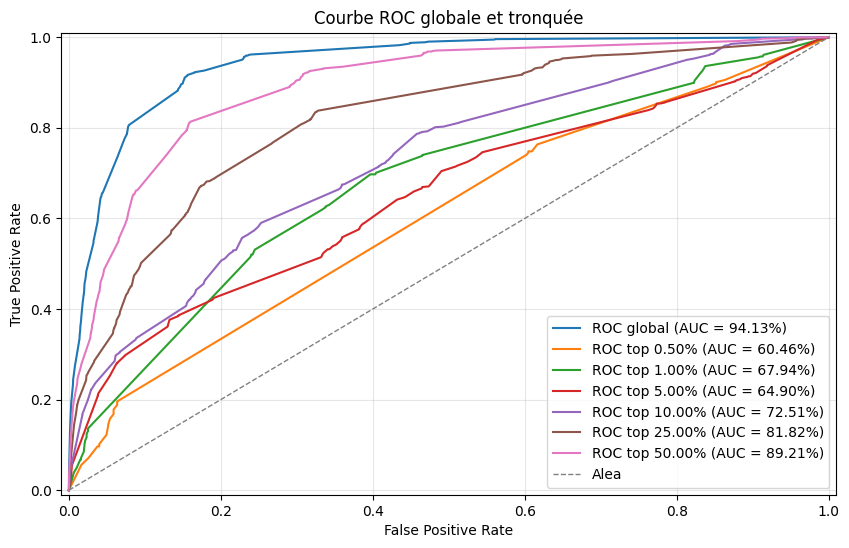

In [28]:
plot_ROC_AUC_global_partial(y_true, y_score, [0.005, 0.01, 0.05, 0.1, 0.25, 0.5], 'top')

# Mesures de calibration des probas

## Courbe de calibration des probas

In [29]:
def reliability_diagram(y_true, y_score, n_bins=20, CHR='', _df=None, _cible='', _proba_theorique = ''):
    
    if CHR=='':
        prob_true, prob_pred = calibration_curve(y_true, y_score, n_bins=n_bins)
        
    else:
        if _df is None or _cible == '' or _proba_theorique == '':
            raise ValueError()
            
        calibration_df = _df.groupby(CHR).agg(
            y_true_mean = (_cible, 'mean'),
            pred_proba_mean=(_proba_theorique, 'mean'),
            n=('cible', 'count')
        ).reset_index()

        prob_true, prob_pred = calibration_df['y_true_mean'], calibration_df['pred_proba_mean']
        
        
    if CHR=='':
        fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(7, 7), sharex=True, constrained_layout=True)
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(7, 7), constrained_layout=True)

        
    ax1.plot(prob_pred, prob_true, marker='o', linewidth=2, label=f"Model (Brier={brier_score_loss(y_true, y_score):.2%})")
    ax1.plot([0,1],[0,1], linestyle='--', color='gray', label='Perfect calibration')
    ax1.set_xlabel("Mean predicted probability")
    ax1.set_ylabel("Fraction of positives")
    ax1.set_title("Reliability diagram (calibration curve)")
    ax1.legend(loc="best")
    ax1.grid(alpha=0.3)
    
    if CHR=='':
        ax2.hist(y_score, bins=n_bins, color='C0', edgecolor='k', alpha=0.7)
    else:
        counts = _df[CHR].value_counts().sort_index()
        ax2.bar(counts.index.astype(str), counts.values, color='C0', edgecolor='k', alpha=0.7)
    ax2.set_xlabel("Predicted probability")
    ax2.set_ylabel("Count")
    ax2.set_title("Histogram of predicted probabilities")
    ax2.grid(alpha=0.2)
    
    N = len(y_score) if len(y_score) > 0 else 1
    ax_perc = ax2.twinx()

    primary_yticks = ax2.get_yticks()
    secondary_yticks = primary_yticks / N 

    ax_perc.set_yticks(primary_yticks)  # positionner aux mêmes valeurs numériques que l'axe gauche
    ax_perc.set_ylim(ax2.get_ylim())  # garder mêmes limites pour alignement visuel
    ax_perc.set_ylabel("Share of total (%)")
    ax_perc.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f"{100.0 * (y / N):.0f}%"))
    
    plt.show()

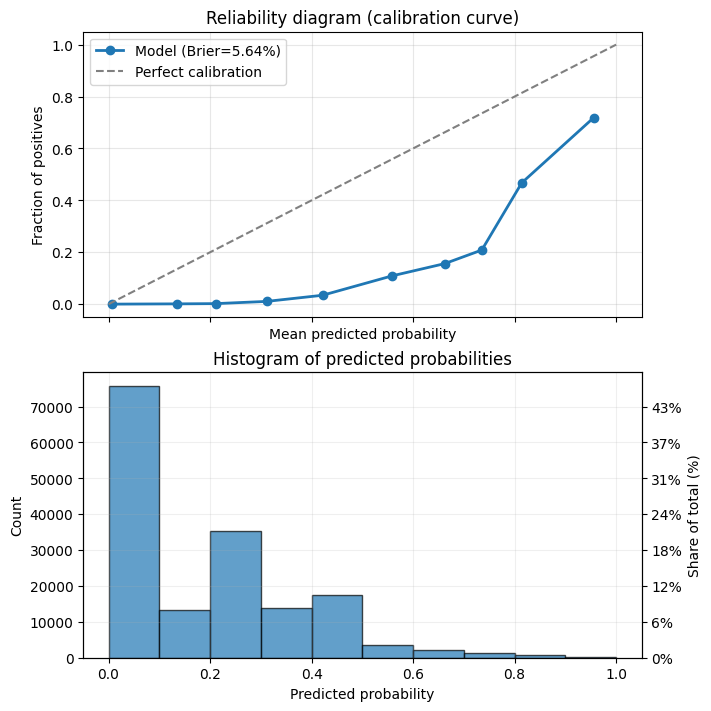

In [30]:
reliability_diagram(y_true, y_score, n_bins=10)

Le reliability diagram (ou calibration curve) compare, pour des groupes de prédictions de même probabilité prédite, la moyenne des probabilités prédites à la fraction observée d’événements dans chaque groupe, et permet de vérifier si, par exemple, les instances prédites à 0.70 aboutissent ~70% du temps à l’événement observé.

Interprétation :
- Si la courbe suit la diagonale y = x : parfaitement calibré (p_pred = fréquence observée).
- Si la courbe est au‑dessus de la diagonale : le modèle sous‑estime le risque (les événements sont plus fréquents que prévu pour ces p_pred).
- Si la courbe est en dessous de la diagonale : le modèle sur‑estime le risque (les événements sont moins fréquents que prévu pour ces p_pred)

Le nombre de bins a un impact fort sur la courbe de calibration. Des bins trop larges masquent des défauts locaux, des bins trop fins donnent du bruit quand peu d’événements sont présents dans chaque bin. D'où l'interet d'afficher la population par beans.

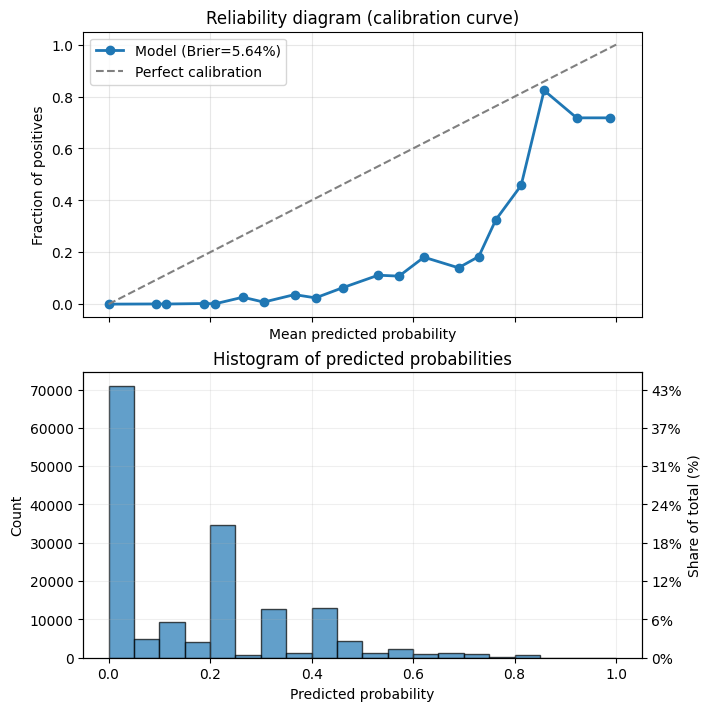

In [31]:
reliability_diagram(y_true, y_score, n_bins=20)

## Brier

In [32]:
brier = brier_score_loss(y_true, y_score)   # (valeur moyenne de (p - o)^2)
print(f"Brier score: {brier:.2%}")

Brier score: 5.64%


Le Brier score mesure l’erreur moyenne quadratique entre les probabilités prédites et les événements observés pour des issues binaires. C'est l'équivalent à l’erreur quadratique moyenne appliquée aux modèles de probabilités.

Le Brier varie entre 0 (prévisions parfaites) et 1 (pire possible pour probabilités bornées). **Un Brier plus faible signifie de meilleures probabilités prédites au sens de la moyenne quadratique**. 

Le Brier permet de mesurer à quelle point les probabilités calibrées sont précises, mais ne dit rien sur l'ordonnancement de ces probabilités, d'où l'analyse necessaire de l'AUC ROC et PR.

**Dans notre cas, on a un Brier faible car une grande partie de la population a une probabilité très faible, à raison.**

# Conclusions de ces analyses

Le modèle construit classe les individus de façon remarcale (très fort Gini), mais les probas ne sont pas bien calibrées

Cela n'est pas grave car, comme expliqué dans le cours, nous n'allons pas nous baser sur les probas calibrées mais sur des CHR dans lesquelels nous allons reclaibrer les probas.

## Construction des CHR (stabilité en risque et volume)

In [33]:
X = df[["id", "proba_theorique"]]
y = df["cible"]

In [34]:
def tree_classifier(X, Y, depth, _min_samples_leaf=0.01):
    
    try:
        X2 = X.drop(["id"], axis=1).copy().astype(float)
    except:
        pass

    tree = DecisionTreeClassifier(
        criterion = "gini",
        max_depth = depth,
        min_samples_leaf=_min_samples_leaf,
        random_state = 26)

    tree.fit(X2.values.reshape(-1,1), Y)
    
    plt.figure(figsize=(12,6))
    plot_tree(tree, filled=True, feature_names=X2.columns, node_ids=True)
    
    ax = plt.gca()
        
    # On calcule le % à la main pour le plot_tree
    n_samples_node = tree.tree_.n_node_samples
    total_samples = n_samples_node[0]
    pourcentages = n_samples_node / total_samples
    labels = [f"{p:.3%}" for p in pourcentages]

    for i, t in enumerate(ax.texts):
        t.set_text(t.get_text() + f"\n\nPop : {labels[i]}")
        
    # On calcule le % de variable cible à la main
    values = tree.tree_.value.squeeze()
    pourcentages = values[:, 1] / values.sum(axis=1)
    
    for i, t in enumerate(ax.texts):
        t.set_text(t.get_text() + f"\nP(y=1) =  : {pourcentages[i]:.3%}")

        
    plt.show()


    # Renvoit le noeuf final calculé
    leaf_ids = tree.apply(X2)
    
    out_df = X.copy()
    out_df["cible"] = y
    out_df["node"] = leaf_ids
    return out_df

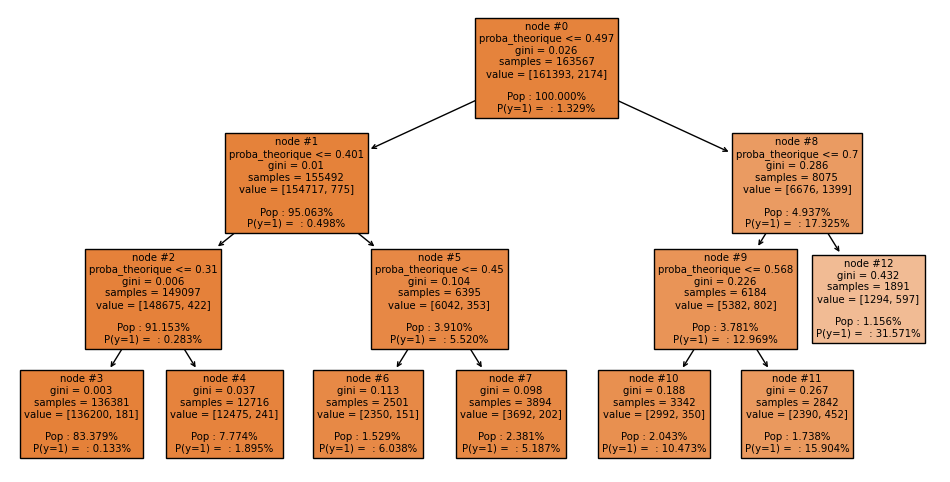

In [35]:
out_tree = tree_classifier(X, y, depth=3)

In [36]:
out_tree.head()

,id,proba_theorique,cible,node
0,202411@9104013803,0.000000,0,3
1,202406@3228813225,0.400476,0,4
2,202411@5599518626,0.000000,0,3
3,202412@1099627835,0.446323,0,6
4,202410@1642094748,0.211630,0,3


In [37]:
out_tree["DATDELHIS_Mm0"] = out_tree["id"].apply(lambda x: x.split('@')[0])

In [38]:
out_tree.head()

,id,proba_theorique,cible,node,DATDELHIS_Mm0
0,202411@9104013803,0.000000,0,3,202411
1,202406@3228813225,0.400476,0,4,202406
2,202411@5599518626,0.000000,0,3,202411
3,202412@1099627835,0.446323,0,6,202412
4,202410@1642094748,0.211630,0,3,202410


In [39]:
def quali(base, x, courbe = True, VARIABLE_CIBLE='cible'):

    # Création du tableau
    resultat = base.groupby(x).agg({
        x : 'size',
        VARIABLE_CIBLE : 'mean'}).rename(columns={x : 'effectif'}).reset_index()

    resultat['pct'] = resultat['effectif'] / resultat['effectif'].sum() * 100
    resultat[VARIABLE_CIBLE] = resultat[VARIABLE_CIBLE]*100

    # Création du graphique
    fig, ax1 = plt.subplots(figsize=(13, 6))
    x_indexes = np.arange(len(resultat[x]))

        # Axe 1
    bars1 = ax1.bar(x_indexes - 0.4/2, resultat['pct'], width = 0.4, color = 'skyblue', label = 'pct')
    ax1.set_ylabel('Répartition en %')
    ax1.set_xlabel(x)
    ax1.bar_label(bars1, labels = [f"{v:.2f}" for v in resultat['pct']], fontsize = 10)

        # Axe 2 (bar ou courbe ça dependra de l'affichage souhaité)
    ax2 = ax1.twinx()
    ax2.set_ylabel('Taux cible (en %)')

    if courbe == True:
        # On affiche celui en courbe
        ax2.plot(x_indexes, resultat[VARIABLE_CIBLE],color = 'salmon',
                 label = VARIABLE_CIBLE, marker = 'o')
        for i, v in enumerate(resultat[VARIABLE_CIBLE]):
            if i % 2 == 0 :
                ax2.text(i, v, f"{v:.1f}%", ha = 'center', va = 'bottom', fontsize = 10)
    else :
        bars2 = ax2.bar(x_indexes + 0.2, resultat[VARIABLE_CIBLE], width = 0.4,
               color = 'salmon', label = VARIABLE_CIBLE)
        for i ,(DECt, v) in enumerate(zip(bars2, resultat[VARIABLE_CIBLE])) :
            if i % 2 == 0 :
                ax2.text(DECt.get_x() + DECt.get_width()/2, v, f"{v:.1f}%",
                        ha = 'center', va = 'bottom', fontsize = 10)

    ax1.set_xticks(x_indexes)
    ax1.set_xticklabels(resultat[x], rotation = 45)

    plt.title(f'Resumé de la variable qualitative : {x}')

    plt.tight_layout()
    plt.show()
    return resultat

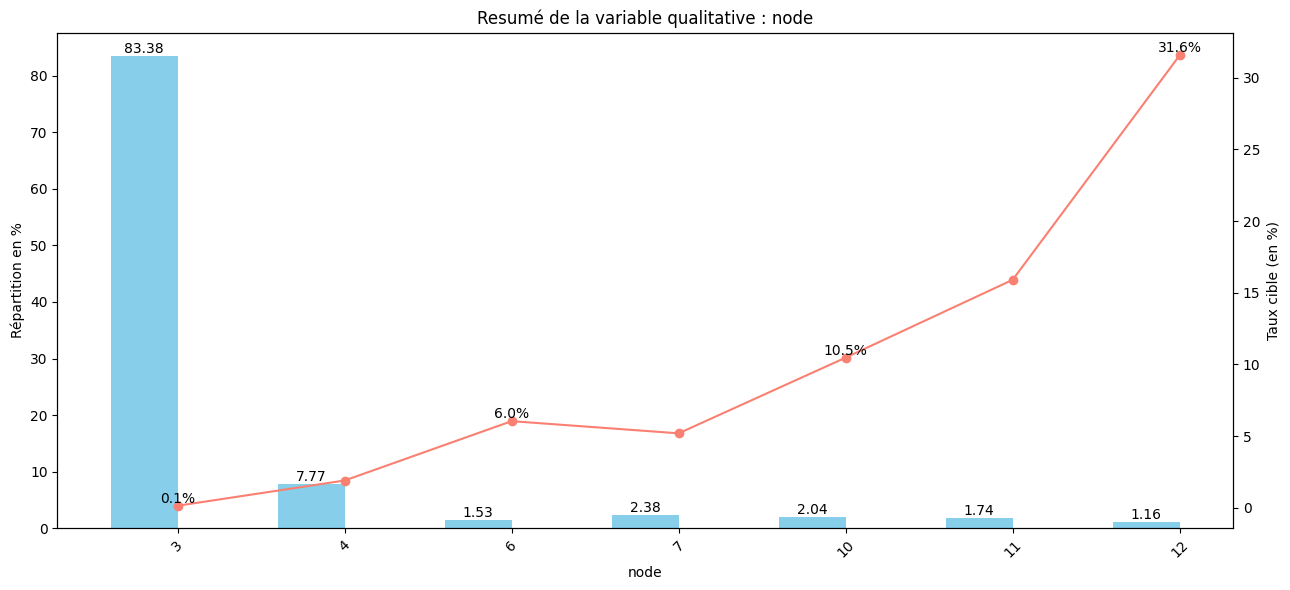

,node,effectif,cible,pct
0,3,136381,0.132716,83.379288
1,4,12716,1.895250,7.774184
2,6,2501,6.037585,1.529037
3,7,3894,5.187468,2.380676
4,10,3342,10.472771,2.043199
5,11,2842,15.904293,1.737514
6,12,1891,31.570598,1.156101


In [40]:
quali(out_tree, 'node')

In [41]:
out_tree["node2"] = np.where(out_tree["node"] == 7, 6, out_tree["node"])

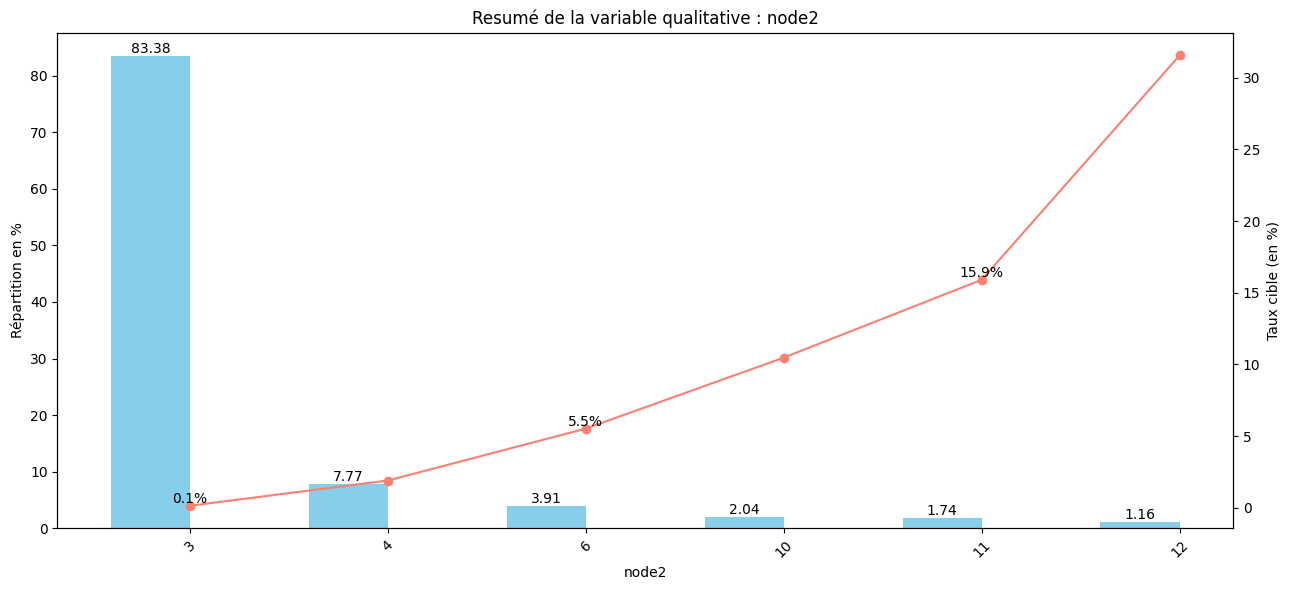

,node2,effectif,cible,pct
0,3,136381,0.132716,83.379288
1,4,12716,1.895250,7.774184
2,6,6395,5.519937,3.909713
3,10,3342,10.472771,2.043199
4,11,2842,15.904293,1.737514
5,12,1891,31.570598,1.156101


In [42]:
quali(out_tree, 'node2')

In [43]:
def stab_volume(base, variable, VARIABLE_CIBLE='cible'):

    # Création des données
    x = base.groupby(['DATDELHIS_Mm0', variable]).size().reset_index(name = 'count')
    x['pct'] = x['count'] / x.groupby('DATDELHIS_Mm0')['count'].transform('sum')*100

    # On pivote les données et on cré un dataframe
    pivot_x = x.pivot_table(index = 'DATDELHIS_Mm0', columns=variable, values='pct')
    pivot_x.index = pivot_x.index.astype('category')

    # Création du graphique

    ax =  pivot_x.plot(marker = 'o', figsize = (10,6))
    plt.title(f'Graphique de stabilité en volume de la variable {variable}')
    plt.ylabel('Pourcentage (%)')

    # Moyenne
    for i, col in enumerate(pivot_x.columns):
        mean_val = pivot_x[col].mean()
        ax.axhline(mean_val, linestyle = '--', color = ax.lines[i].get_color(),
                  alpha = 0.7, label = f'Moy {col} ({mean_val:.1f}%)')



    plt.legend()
    plt.show()

    return pivot_x


def stab_risque(base, variable, VARIABLE_CIBLE='cible'):

    # Création des données
    x = base.groupby(['DATDELHIS_Mm0', variable]).agg({
        VARIABLE_CIBLE : 'mean'
    })

    x[VARIABLE_CIBLE] = x[VARIABLE_CIBLE]*100

    # On pivote les données et on crée un dataframe
    pivot_x = x.pivot_table(index = 'DATDELHIS_Mm0', columns=variable, values = VARIABLE_CIBLE)
    pivot_x.index = pivot_x.index.astype('category')


    # Création du graphique
    ax = pivot_x.plot(marker = 'o', figsize = (10,6))
    plt.title(f'Graphique de stabilité en risque de la variable {variable}')
    plt.ylabel('Pourcentage (%)')

    # Moyenne
    for i, col in enumerate(pivot_x.columns):
        mean_val = pivot_x[col].mean()
        ax.axhline(mean_val, linestyle = '--', color = ax.lines[i].get_color(),
                  alpha = 0.7, label = f'Moy {col} ({mean_val:.1f}%)')

    plt.legend()
    plt.show()

    return pivot_x

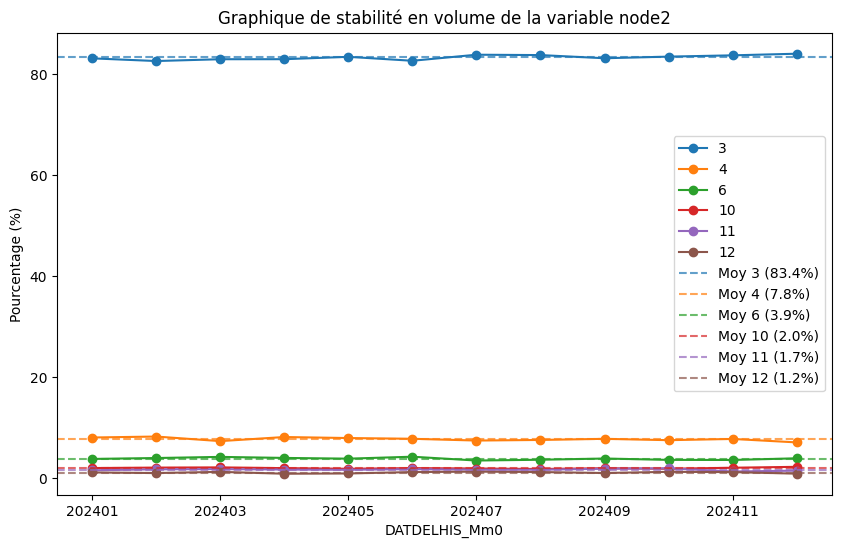

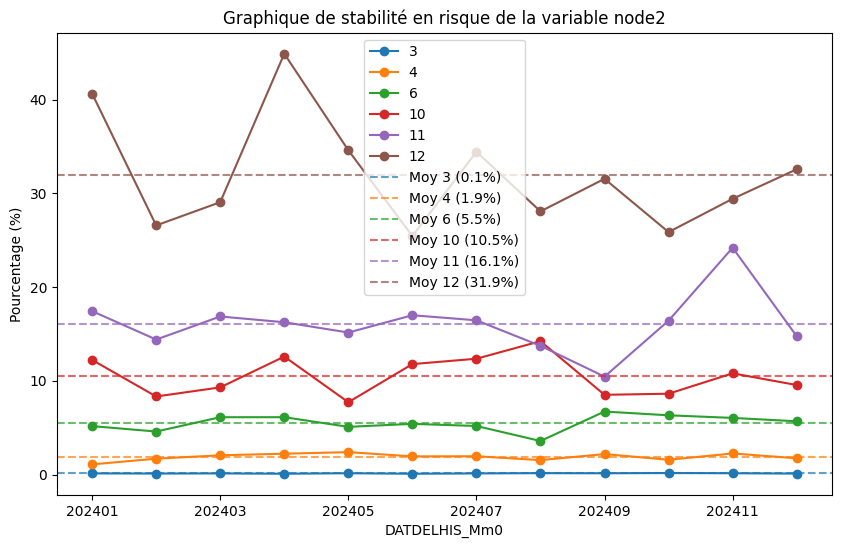

node2,3,4,6,10,11,12
DATDELHIS_Mm0,,,,,,
202401,0.133144,1.093892,5.172414,12.230216,17.431193,40.625000
202402,0.116739,1.700985,4.595588,8.333333,14.403292,26.573427
202403,0.130959,2.060844,6.122449,9.302326,16.862745,29.050279
202404,0.096865,2.230152,6.126126,12.589928,16.250000,44.881890
202405,0.150177,2.398524,5.094340,7.722008,15.151515,34.586466
202406,0.096729,1.946247,5.414552,11.785714,16.996047,25.433526
202407,0.131280,1.958864,5.186722,12.359551,16.455696,34.426230
202408,0.158144,1.547389,3.585657,14.229249,13.733906,28.070175
202409,0.146249,2.191781,6.727273,8.510638,10.447761,31.543624


In [44]:
stab_volume(out_tree, 'node2')
stab_risque(out_tree, 'node2')

In [45]:
out_tree['node_v1'] = out_tree['node2'].astype(str).replace(
    {
        '3': '1',
        '4': '2',
        '6': "3",
        "10": '4',
        "11": '5',
        "12": '6'
    })

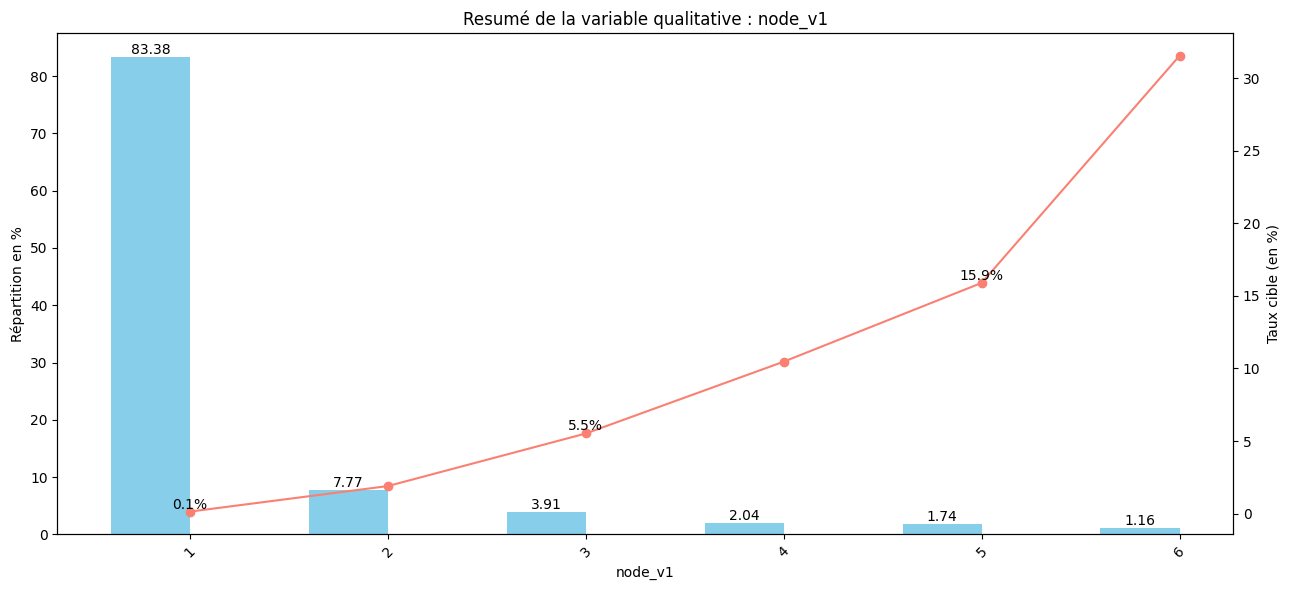

,node_v1,effectif,cible,pct
0,1,136381,0.132716,83.379288
1,2,12716,1.895250,7.774184
2,3,6395,5.519937,3.909713
3,4,3342,10.472771,2.043199
4,5,2842,15.904293,1.737514
5,6,1891,31.570598,1.156101


In [46]:
quali(out_tree, 'node_v1')

## V2
On essaye de voir si on ne peut pas redécouper la CHR 1 de façon plus précise

In [47]:
out_tree.head()

,id,proba_theorique,cible,node,DATDELHIS_Mm0,node2,node_v1
0,202411@9104013803,0.000000,0,3,202411,3,1
1,202406@3228813225,0.400476,0,4,202406,4,2
2,202411@5599518626,0.000000,0,3,202411,3,1
3,202412@1099627835,0.446323,0,6,202412,6,3
4,202410@1642094748,0.211630,0,3,202410,3,1


In [48]:
X1 = out_tree[out_tree['node_v1'] == '1'][["id", "proba_theorique"]]
y1 = out_tree[out_tree['node_v1'] == '1']["cible"]

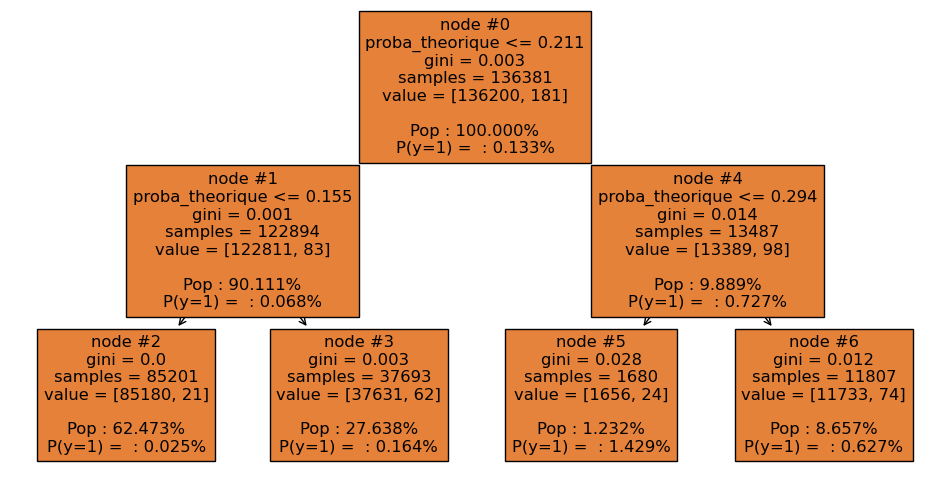

In [49]:
out_tree2 = tree_classifier(X1, y1, depth=2)

In [50]:
out_tree2['node2'] = np.where(out_tree2['node'] == 6, 5, out_tree2['node'])

In [51]:
out_tree2["DATDELHIS_Mm0"] = out_tree2["id"].apply(lambda x: x.split('@')[0])

In [52]:
out_tree2.head()

,id,proba_theorique,cible,node,node2,DATDELHIS_Mm0
0,202411@9104013803,0.000000,0,2,2,202411
2,202411@5599518626,0.000000,0,2,2,202411
4,202410@1642094748,0.211630,0,5,5,202410
5,202408@6303265321,0.000000,0,2,2,202408
6,202404@7673328365,0.301765,0,6,5,202404


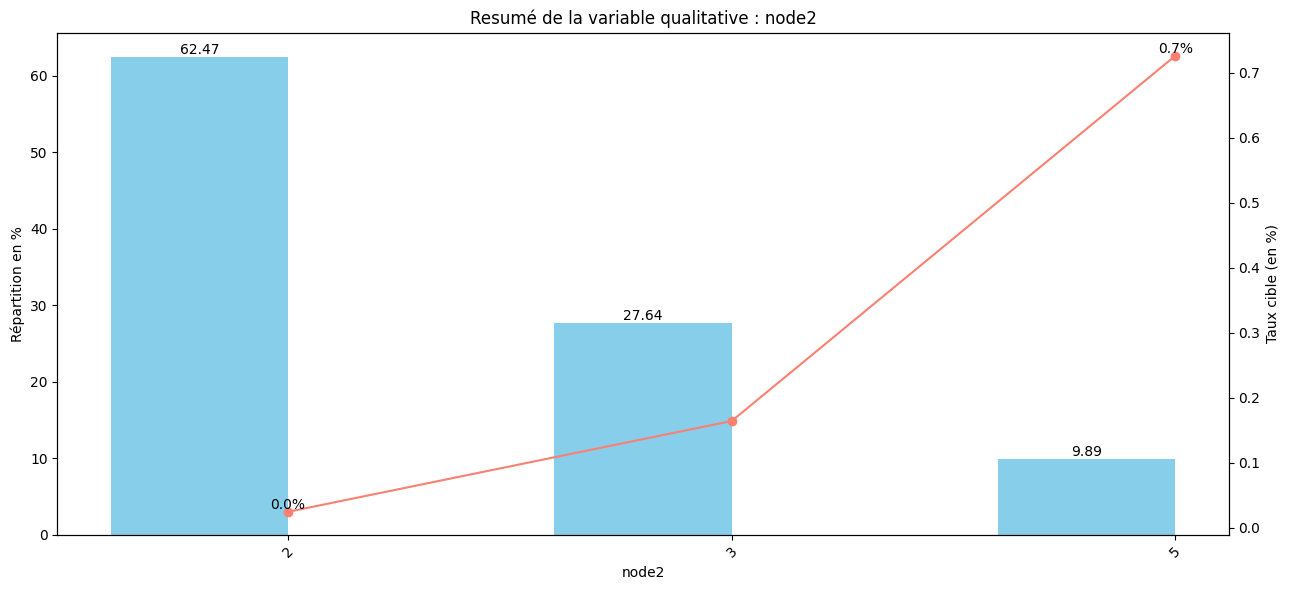

,node2,effectif,cible,pct
0,2,85201,0.024648,62.472778
1,3,37693,0.164487,27.638014
2,5,13487,0.726626,9.889207


In [53]:
quali(out_tree2, 'node2')

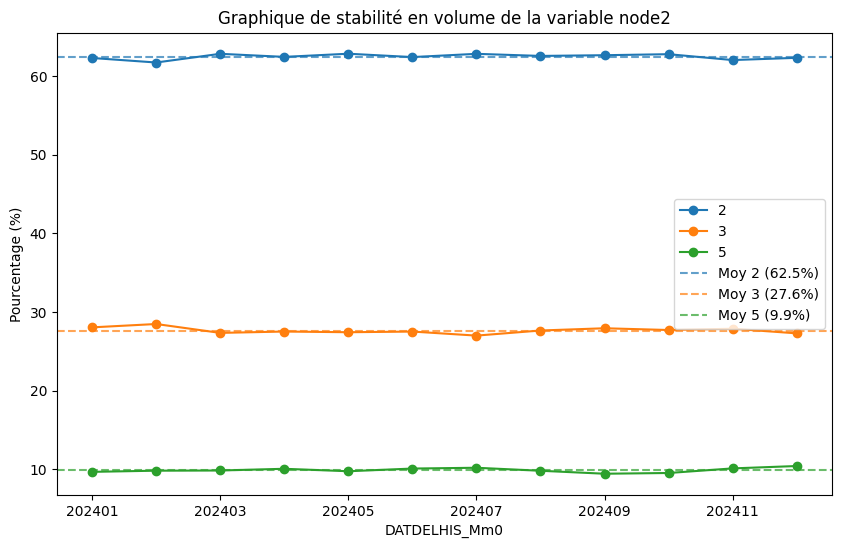

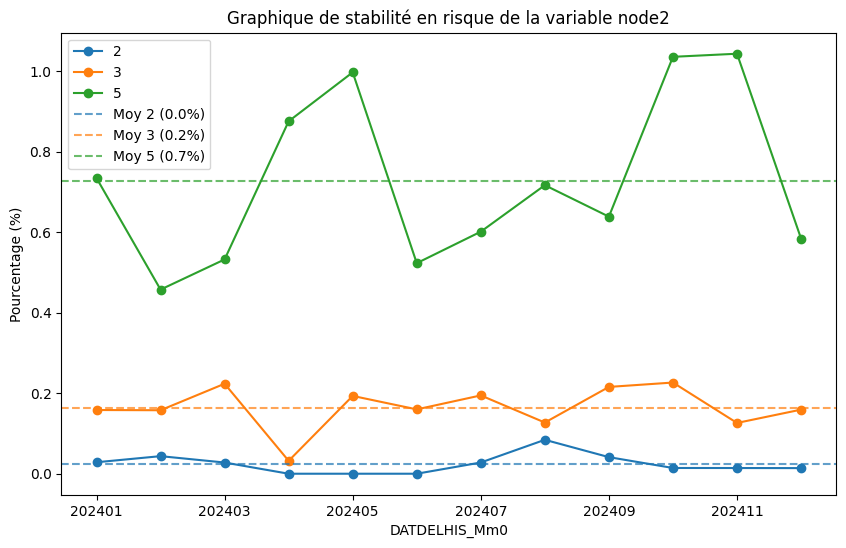

node2,2,3,5
DATDELHIS_Mm0,,,
202401,0.028498,0.158278,0.734619
202402,0.043649,0.157729,0.457457
202403,0.027793,0.223571,0.532387
202404,0.000000,0.032010,0.875657
202405,0.000000,0.193299,0.997280
202406,0.000000,0.159847,0.523104
202407,0.027863,0.194553,0.601375
202408,0.084270,0.127146,0.716846
202409,0.041197,0.215650,0.638686


In [54]:
stab_volume(out_tree2, 'node2')
stab_risque(out_tree2, 'node2')

In [55]:
out_tree2['node_v2'] = out_tree2['node2'].astype(str).replace(
    {
        '2': '1a',
        '3': '1b',
        '5': "1c",
    })

In [56]:
out_tree2.head()

,id,proba_theorique,cible,node,node2,DATDELHIS_Mm0,node_v2
0,202411@9104013803,0.000000,0,2,2,202411,1a
2,202411@5599518626,0.000000,0,2,2,202411,1a
4,202410@1642094748,0.211630,0,5,5,202410,1c
5,202408@6303265321,0.000000,0,2,2,202408,1a
6,202404@7673328365,0.301765,0,6,5,202404,1c


## VF

In [57]:
out_tree_vf = pd.merge(left=out_tree, right=out_tree2, how='left', on="id")

In [58]:
out_tree_vf = out_tree_vf[['id', 'DATDELHIS_Mm0_x', 'cible_x', 'proba_theorique_x', 'node_v1', 'node_v2']]
out_tree_vf.columns = ['id', 'DATDELHIS_Mm0', 'cible', 'proba_theorique', 'node_v1', 'node_v2']

out_tree_vf['node_vf'] = np.where(out_tree_vf['node_v1'] == '1', out_tree_vf['node_v2'], out_tree_vf['node_v1'])

out_tree_vf['node_vf'] = out_tree_vf['node_vf'].astype(str).replace(
    {
        '1a': '1',
        '1b': '2',
        '1c': '3',
        '2': '4',
        '3': '5',
        '4': '6',
        '5': '7',
        '6': '8'
    })

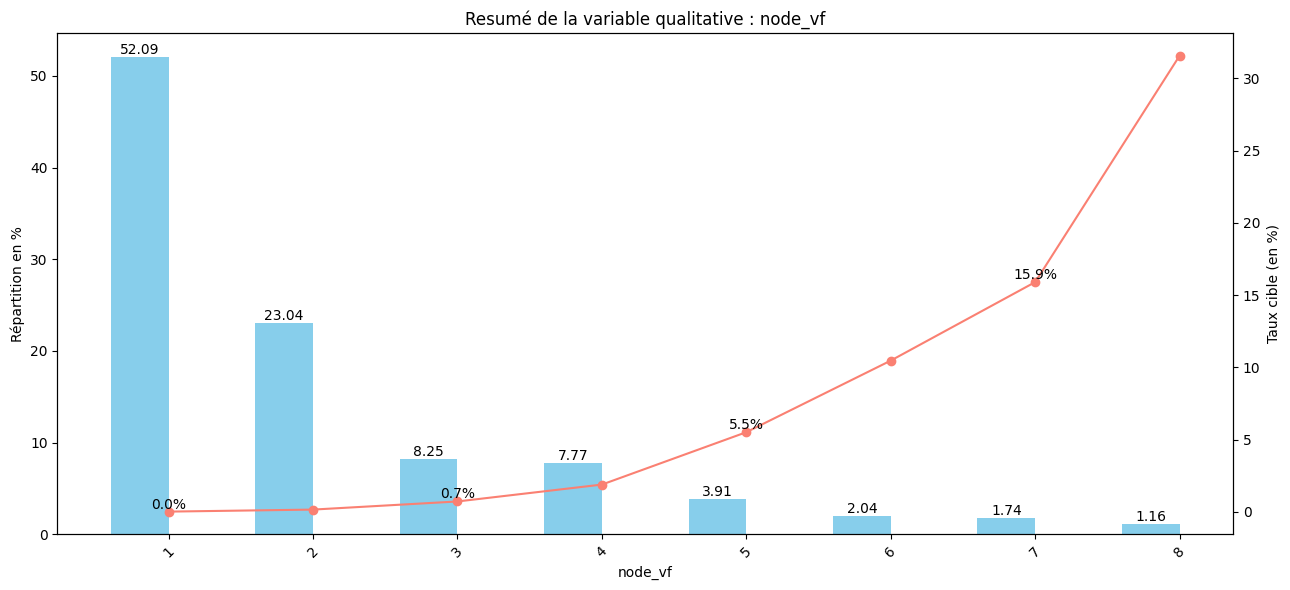

,node_vf,effectif,cible,pct
0,1,85201,0.024648,52.089358
1,2,37693,0.164487,23.044379
2,3,13487,0.726626,8.245551
3,4,12716,1.895250,7.774184
4,5,6395,5.519937,3.909713
5,6,3342,10.472771,2.043199
6,7,2842,15.904293,1.737514
7,8,1891,31.570598,1.156101


In [59]:
quali(out_tree_vf, 'node_vf', VARIABLE_CIBLE='cible')

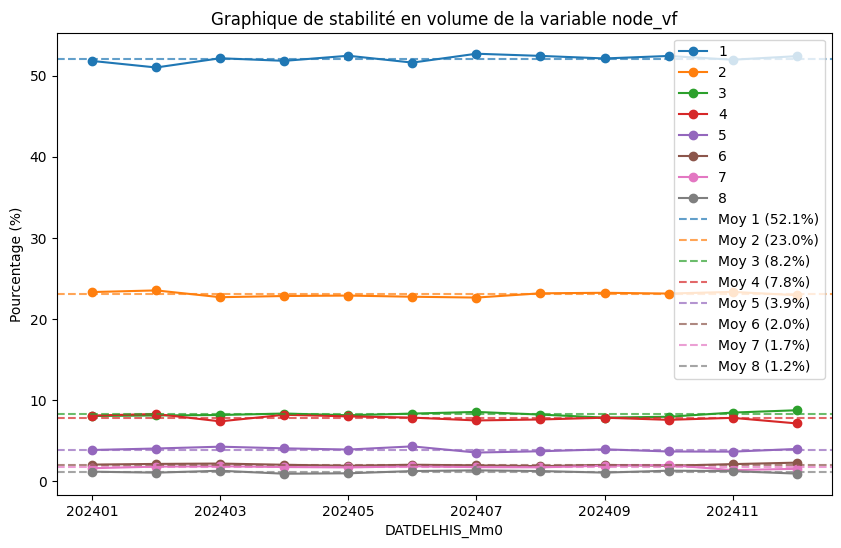

node_vf,1,2,3,4,5,6,7,8
DATDELHIS_Mm0,,,,,,,,
202401,51.827782,23.329149,8.042242,8.101322,3.854959,2.053024,1.609925,1.181597
202402,51.020711,23.532032,8.113726,8.291886,4.038305,2.137926,1.803875,1.061540
202403,52.160046,22.694984,8.169035,7.386199,4.262105,2.181792,1.848362,1.297478
202404,51.838854,22.841266,8.349784,8.196242,4.057907,2.032609,1.754771,0.928566
202405,52.467360,22.895921,8.136018,7.995869,3.909419,1.910452,1.703917,0.981043
202406,51.622054,22.752400,8.343032,7.848414,4.298807,2.036660,1.840268,1.258365
202407,52.717391,22.649824,8.548766,7.498531,3.539953,1.960928,1.740599,1.344007
202408,52.449355,23.174954,8.220994,7.616943,3.697974,1.863720,1.716390,1.259669
202409,52.133448,23.238832,7.846506,7.839347,3.937572,2.018900,1.918671,1.066724


In [60]:
stab_volume(out_tree_vf, 'node_vf')

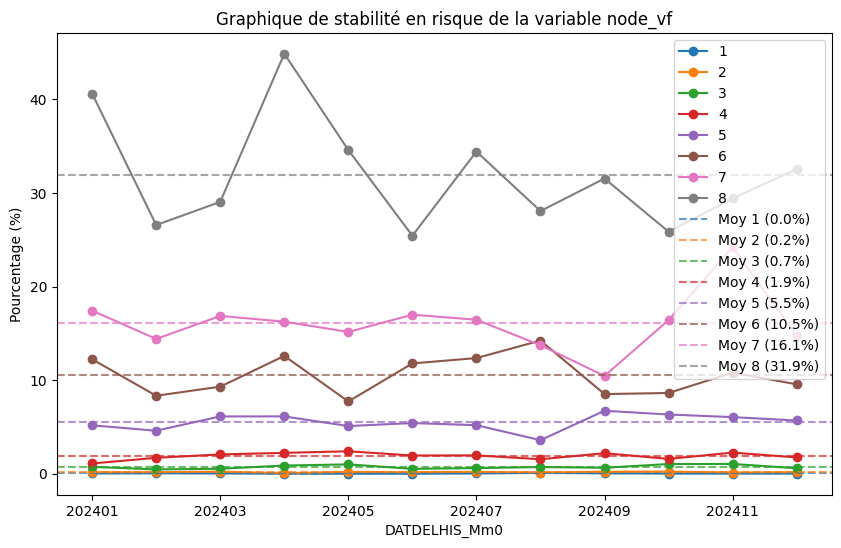

node_vf,1,2,3,4,5,6,7,8
DATDELHIS_Mm0,,,,,,,,
202401,0.028498,0.158278,0.734619,1.093892,5.172414,12.230216,17.431193,40.625000
202402,0.043649,0.157729,0.457457,1.700985,4.595588,8.333333,14.403292,26.573427
202403,0.027793,0.223571,0.532387,2.060844,6.122449,9.302326,16.862745,29.050279
202404,0.000000,0.032010,0.875657,2.230152,6.126126,12.589928,16.250000,44.881890
202405,0.000000,0.193299,0.997280,2.398524,5.094340,7.722008,15.151515,34.586466
202406,0.000000,0.159847,0.523104,1.946247,5.414552,11.785714,16.996047,25.433526
202407,0.027863,0.194553,0.601375,1.958864,5.186722,12.359551,16.455696,34.426230
202408,0.084270,0.127146,0.716846,1.547389,3.585657,14.229249,13.733906,28.070175
202409,0.041197,0.215650,0.638686,2.191781,6.727273,8.510638,10.447761,31.543624


In [61]:
stab_risque(out_tree_vf, 'node_vf')

In [62]:
out_tree_vf.columns = ['id', 'DATDELHIS_Mm0', 'cible', 'proba_theorique', 'node_v1', 'node_v2', 'CHR']

In [63]:
df2 = pd.merge(df, out_tree_vf[['id', 'CHR']], how='left', on='id')

## Forçages

Certaines données ne permettent pas d'etre rentrées dans le score car trop peu peuplées / instables. On peut les utiliser comme "forçage" en CHR risquées

### FDC

In [64]:
df2['part_FDC_prio_2'] = np.where(df2['part_FDC_prio'] == 'Réseau', 1, 2)

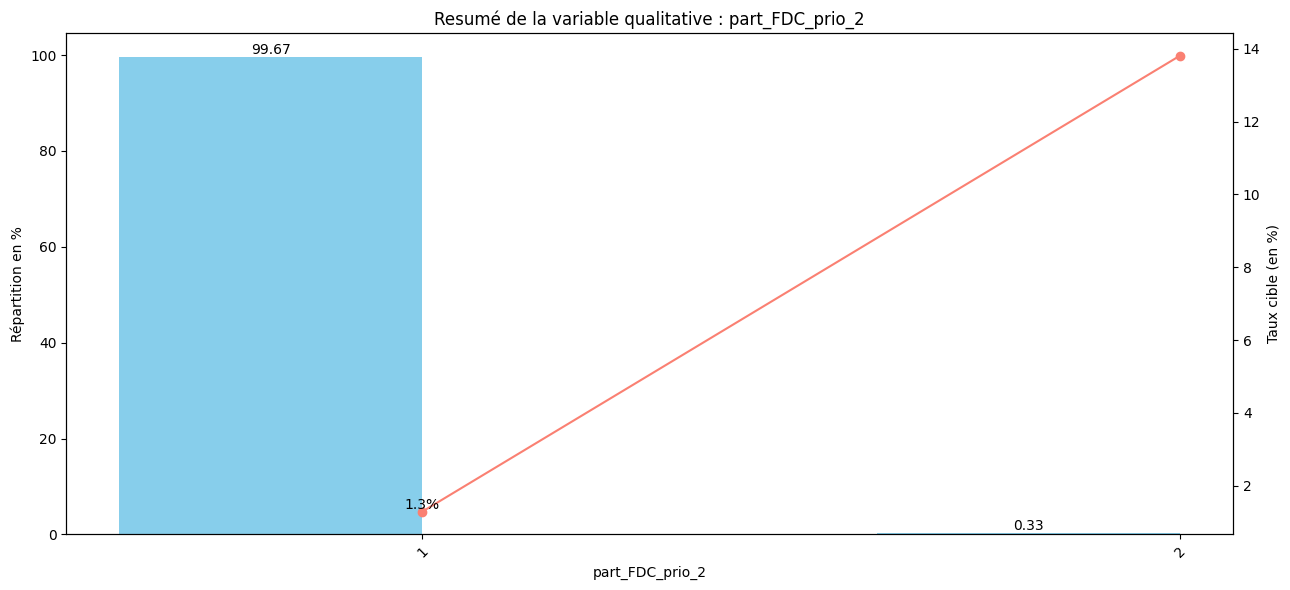

,part_FDC_prio_2,effectif,cible,pct
0,1,163024,1.287540,99.668026
1,2,543,13.812155,0.331974


In [65]:
quali(df2, 'part_FDC_prio_2', VARIABLE_CIBLE='cible')

In [66]:
df2[df2['part_FDC_prio_2'] == 2].groupby('CHR')['part_FDC_prio_2'].count()

CHR
1     37
2     96
3     40
4     71
5     38
6     37
7    141
8     83
Name: part_FDC_prio_2, dtype: int64

In [67]:
df2.groupby(['CHR', 'part_FDC_prio_2'])['cible'].mean()

CHR  part_FDC_prio_2
1    1                  0.000247
     2                  0.000000
2    1                  0.001649
     2                  0.000000
3    1                  0.007288
     2                  0.000000
4    1                  0.018743
     2                  0.056338
5    1                  0.054900
     2                  0.105263
6    1                  0.104387
     2                  0.135135
7    1                  0.161051
     2                  0.120567
8    1                  0.305310
     2                  0.542169
Name: cible, dtype: float64

In [68]:
# On va forcer les observtions qui sont en part_FDC_prio_2=2 en chr7 minimum, et on les laisse en 8 si ils y sont deja
df2['CHR2'] = np.where( (df2['part_FDC_prio_2'] == 2) & (df2['CHR'].astype(int) <= 7), '7', df2['CHR'])

### LS

In [69]:
df2['TOPLS2'] = np.where(df2['TOPLS'] == 0, 1, 2)

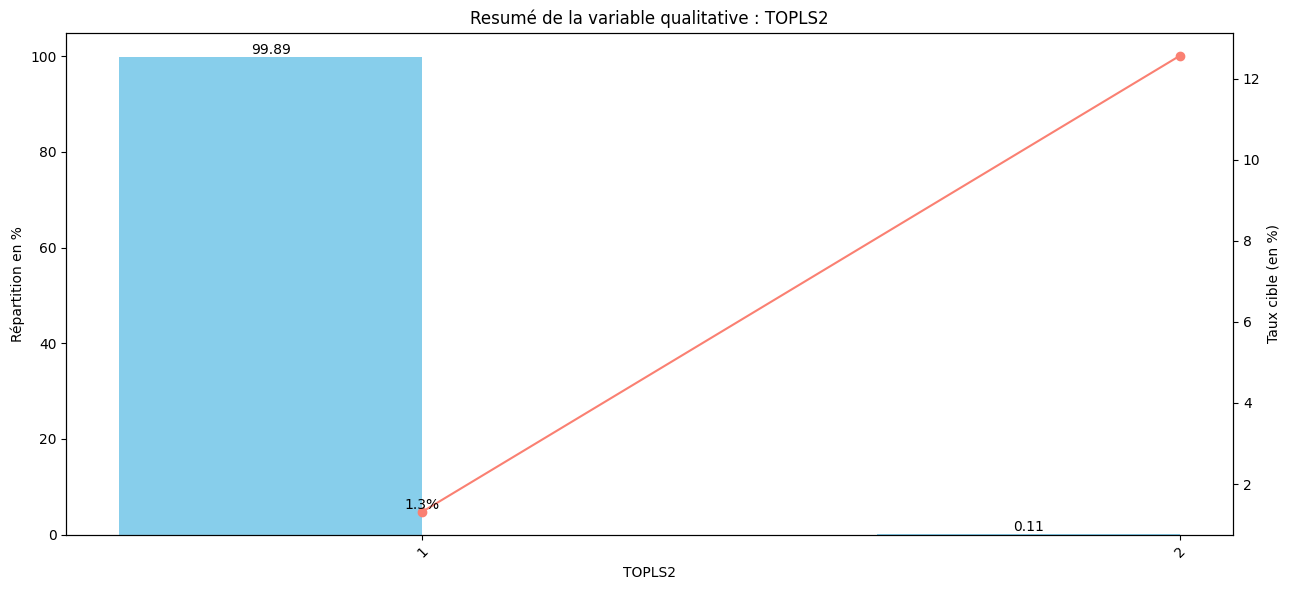

,TOPLS2,effectif,cible,pct
0,1,163384,1.316530,99.888119
1,2,183,12.568306,0.111881


In [70]:
quali(df2, 'TOPLS2', VARIABLE_CIBLE='cible')

In [71]:
df2[df2['TOPLS2'] == 2].groupby('CHR')['TOPLS2'].count()

CHR
1      3
2      6
3      8
4    107
5     11
6     15
7     13
8     20
Name: TOPLS2, dtype: int64

In [72]:
df2.groupby(['CHR', 'TOPLS2'])['cible'].mean()

CHR  TOPLS2
1    1         0.000246
     2         0.000000
2    1         0.001592
     2         0.333333
3    1         0.007048
     2         0.375000
4    1         0.018796
     2         0.037383
5    1         0.054825
     2         0.272727
6    1         0.104899
     2         0.066667
7    1         0.158713
     2         0.230769
8    1         0.315339
     2         0.350000
Name: cible, dtype: float64

In [73]:
df2['CHR2'] = np.where( (df2['TOPLS2'] == 2) & (df2['CHR'].astype(int) <= 6), '6', df2['CHR'])

In [74]:
df2.groupby(['CHR2', 'TOPLS2'])['cible'].mean()

CHR2  TOPLS2
1     1         0.000246
2     1         0.001592
3     1         0.007048
4     1         0.018796
5     1         0.054825
6     1         0.104899
      2         0.086667
7     1         0.158713
      2         0.230769
8     1         0.315339
      2         0.350000
Name: cible, dtype: float64

**Remarque : on aurait pu/du faire un forçage plus propre selon la modalité du topls**

### Interdit BDF

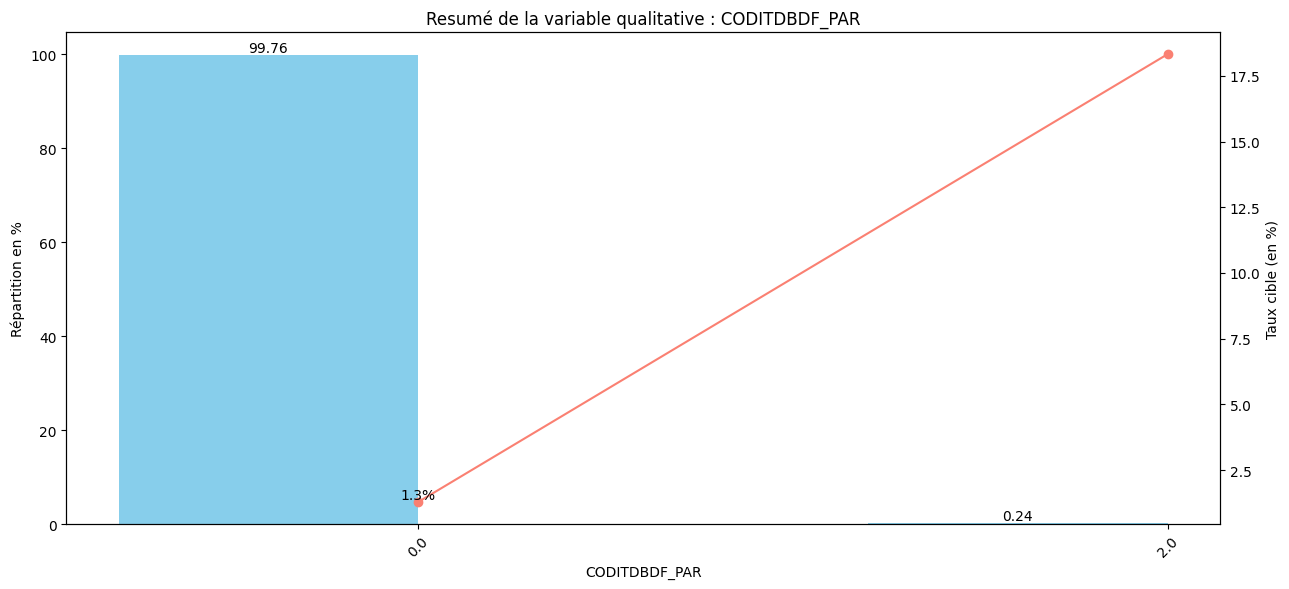

,CODITDBDF_PAR,effectif,cible,pct
0,0.0,163057,1.289120,99.759559
1,2.0,393,18.320611,0.240441


In [75]:
quali(df2, 'CODITDBDF_PAR', VARIABLE_CIBLE='cible')

In [76]:
df2[df2['CODITDBDF_PAR'] == 2].groupby('CHR')['TOPLS2'].count()

CHR
1    38
2    44
3    62
4    79
5    54
6    52
7    19
8    45
Name: TOPLS2, dtype: int64

In [77]:
df2.groupby(['CHR', 'CODITDBDF_PAR'])['cible'].mean()

CHR  CODITDBDF_PAR
1    0.0              0.000235
     2.0              0.026316
2    0.0              0.001567
     2.0              0.068182
3    0.0              0.007002
     2.0              0.064516
4    0.0              0.018099
     2.0              0.177215
5    0.0              0.053794
     2.0              0.222222
6    0.0              0.102955
     2.0              0.230769
7    0.0              0.157503
     2.0              0.421053
8    0.0              0.315016
     2.0              0.400000
Name: cible, dtype: float64

In [78]:
df2['CHR2'] = np.where( (df2['CODITDBDF_PAR'] == 2) & (df2['CHR'].astype(int) <= 7), '7', df2['CHR'])

In [79]:
df2.groupby(['CHR2', 'CODITDBDF_PAR'])['cible'].mean()

CHR2  CODITDBDF_PAR
1     0.0              0.000235
2     0.0              0.001567
3     0.0              0.007002
4     0.0              0.018099
5     0.0              0.053794
6     0.0              0.102955
7     0.0              0.157503
      2.0              0.155172
8     0.0              0.315016
      2.0              0.400000
Name: cible, dtype: float64

## Nouvelle courbe de calibration

In [80]:
tx_cible_chr = pd.DataFrame(df2.groupby('CHR')['cible'].mean()).reset_index()
tx_cible_chr.columns = ['CHR', 'tx_CHR']

tx_cible_chr.sort_values(by='tx_CHR').style.format({'tx_CHR': lambda x: f"{x:,.3%}"})

,CHR,tx_CHR
0,1,0.025%
1,2,0.164%
2,3,0.727%
3,4,1.895%
4,5,5.520%
5,6,10.473%
6,7,15.904%
7,8,31.571%


In [81]:
tx_cible_chr = pd.DataFrame(df2.groupby('CHR2')['cible'].mean()).reset_index()
tx_cible_chr.columns = ['CHR2', 'tx_CHR']
tx_cible_chr.sort_values(by='tx_CHR')

tx_cible_chr.sort_values(by='tx_CHR').style.format({'tx_CHR': lambda x: f"{x:,.3%}"})

,CHR2,tx_CHR
0,1,0.023%
1,2,0.157%
2,3,0.700%
3,4,1.796%
4,5,5.378%
5,6,10.274%
6,7,15.705%
7,8,31.571%


In [82]:
df3 = pd.merge(df2, tx_cible_chr, how='left', on='CHR2')

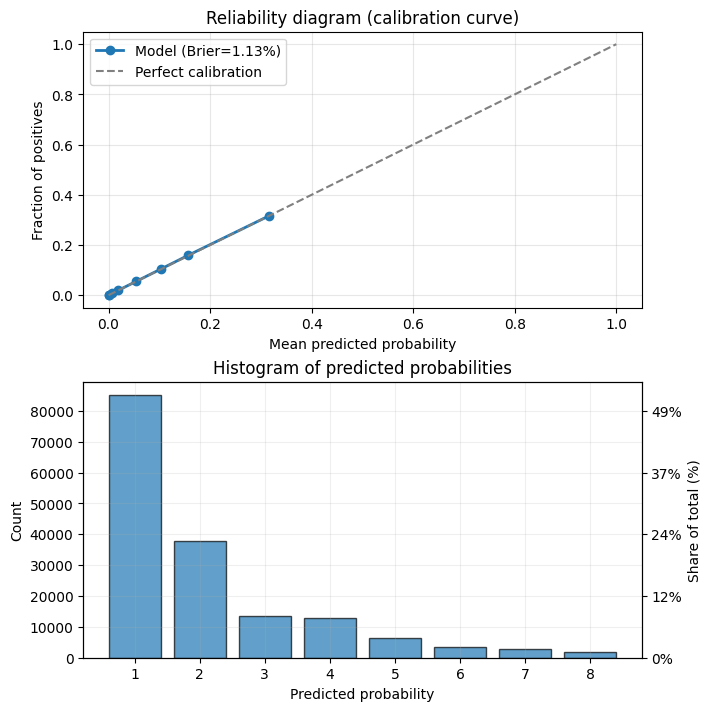

In [83]:
y_true = df3["cible"].astype(int).values        # 0/1
y_score = df3["tx_CHR"].astype(float).values  # score/1000

reliability_diagram(y_true, y_score, CHR='CHR', n_bins=8, _df=df3, _cible='cible', _proba_theorique='tx_CHR')


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


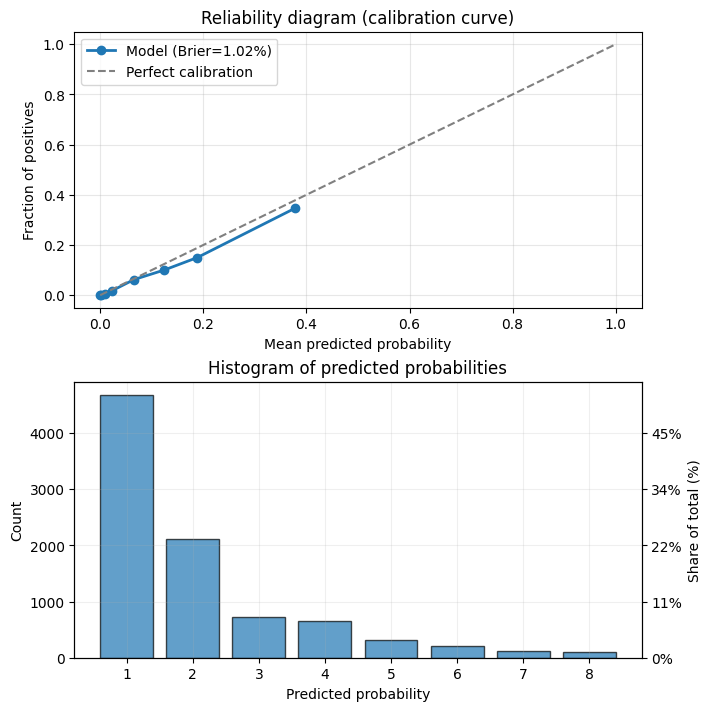

In [84]:
df4 = df3[(df3["rnd_1_20"] == 20) & (df3['DATDELHIS_Mm0'].isin((202411, 202412)) )]

# Ajout d'une marge (symbolique)
df4['tx_CHR'] = df4['tx_CHR']*1.2

y_true = df4["cible"].astype(int).values        # 0/1
y_score = df4["tx_CHR"].astype(float).values  # score/1000

reliability_diagram(y_true, y_score, CHR='CHR', n_bins=8, _df=df4, _cible='cible', _proba_theorique='tx_CHR')